In [1]:
import hierarchy as hrcy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
capacities = [4, 2, 1]
r = 1.1
lmbda = [2, 3]
mu = [[0.2, 0.1], [1.2, 1.1], [1.5, 1.7]]

In [3]:
number_of_states = hrcy.states.enumerate_states(capacities=capacities)
number_of_states

90

In [4]:
states = tuple(hrcy.states.get_states(capacities=capacities))
states

(((0, 4), (0, 2), (0, 1)),
 ((0, 4), (0, 2), (1, 0)),
 ((0, 4), (1, 1), (0, 1)),
 ((0, 4), (1, 1), (1, 0)),
 ((0, 4), (2, 0), (0, 1)),
 ((0, 4), (2, 0), (1, 0)),
 ((0, 4), (0, 1), (0, 1)),
 ((0, 4), (0, 1), (1, 0)),
 ((0, 4), (1, 0), (0, 1)),
 ((0, 4), (1, 0), (1, 0)),
 ((1, 3), (0, 2), (0, 1)),
 ((1, 3), (0, 2), (1, 0)),
 ((1, 3), (1, 1), (0, 1)),
 ((1, 3), (1, 1), (1, 0)),
 ((1, 3), (2, 0), (0, 1)),
 ((1, 3), (2, 0), (1, 0)),
 ((1, 3), (0, 1), (0, 1)),
 ((1, 3), (0, 1), (1, 0)),
 ((1, 3), (1, 0), (0, 1)),
 ((1, 3), (1, 0), (1, 0)),
 ((2, 2), (0, 2), (0, 1)),
 ((2, 2), (0, 2), (1, 0)),
 ((2, 2), (1, 1), (0, 1)),
 ((2, 2), (1, 1), (1, 0)),
 ((2, 2), (2, 0), (0, 1)),
 ((2, 2), (2, 0), (1, 0)),
 ((2, 2), (0, 1), (0, 1)),
 ((2, 2), (0, 1), (1, 0)),
 ((2, 2), (1, 0), (0, 1)),
 ((2, 2), (1, 0), (1, 0)),
 ((3, 1), (0, 2), (0, 1)),
 ((3, 1), (0, 2), (1, 0)),
 ((3, 1), (1, 1), (0, 1)),
 ((3, 1), (1, 1), (1, 0)),
 ((3, 1), (2, 0), (0, 1)),
 ((3, 1), (2, 0), (1, 0)),
 ((3, 1), (0, 1), (0, 1)),
 

Compute linear algebraically:

In [5]:
stationary_vector = hrcy.get_stationary_distribution(
    capacities=capacities,
    r=r,
    lmbda=lmbda,
    mu=mu,
)

In [6]:
stationary_vector

array([0.01580472+0.j, 0.05860136+0.j, 0.00764174+0.j, 0.02833432+0.j,
       0.00453408+0.j, 0.01681162+0.j, 0.02414116+0.j, 0.08951153+0.j,
       0.0138468 +0.j, 0.0513417 +0.j, 0.01736848+0.j, 0.06439951+0.j,
       0.00889025+0.j, 0.03296363+0.j, 0.00512683+0.j, 0.01900945+0.j,
       0.01417792+0.j, 0.05256943+0.j, 0.00758642+0.j, 0.02812921+0.j,
       0.01060462+0.j, 0.03932021+0.j, 0.00533585+0.j, 0.01978448+0.j,
       0.00323533+0.j, 0.01199608+0.j, 0.00860386+0.j, 0.03190172+0.j,
       0.00464373+0.j, 0.0172182 +0.j, 0.00625207+0.j, 0.02318167+0.j,
       0.0033343 +0.j, 0.01236303+0.j, 0.00200952+0.j, 0.00745099+0.j,
       0.00518021+0.j, 0.01920737+0.j, 0.00289484+0.j, 0.01073358+0.j,
       0.00207326+0.j, 0.0076873 +0.j, 0.00113584+0.j, 0.00421153+0.j,
       0.00069066+0.j, 0.00256085+0.j, 0.0036436 +0.j, 0.01350987+0.j,
       0.00188929+0.j, 0.00700518+0.j, 0.00632189+0.j, 0.02344054+0.j,
       0.00611339+0.j, 0.02266746+0.j, 0.00196477+0.j, 0.00728504+0.j,
      

/home/vince/anaconda3/envs/hrcy/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


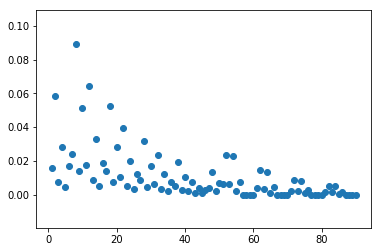

In [7]:
plt.scatter(range(1, number_of_states + 1), stationary_vector)

In [8]:
states[np.argmax(stationary_vector)]

((0, 4), (0, 1), (1, 0))

Obtain stationary vector using simulation.

In [10]:
state_in = np.array([[3, 1], [1, 0], [0, 1]])
potential_states = hrcy.transitions.get_potential_states(state_in=state_in, capacities=capacities)
potential_states

[array([[2., 1.],
        [2., 0.],
        [0., 1.]]), array([[3., 0.],
        [1., 1.],
        [0., 1.]])]

In [11]:
import collections

number_of_repetitions = 100
max_transitions = 1000

all_history = []

for seed in range(number_of_repetitions):
    output = list(
        hrcy.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
    history, dates = map(list, zip(*output))
    all_history += list(map(lambda array: tuple(map(tuple, array.astype(int))), history))
    
history_count = collections.Counter(all_history)
total = np.sum([v for v in history_count.values()])
simulated_stationary_vector = np.array([history_count.get(state, 0) / (number_of_repetitions * max_transitions) 
                                        for state in states])
total

100000

/home/vince/anaconda3/envs/hrcy/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


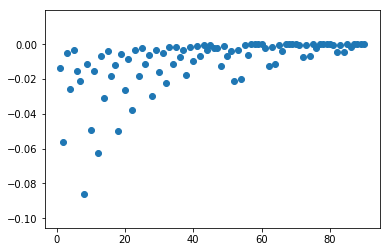

In [12]:
plt.scatter(range(1, number_of_states + 1), simulated_stationary_vector - stationary_vector)

In [13]:
states[np.argmax(simulated_stationary_vector)]

((0, 4), (0, 1), (1, 0))